<a href="https://colab.research.google.com/github/jarodchristiansen/PythonProjects/blob/master/CarsFirstExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade -q gspread
!pip install gspread-dataframe
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.10.0)


These requirements should normally be satisfied, they are dependencies for gspread to pull the dataframe

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe

from sklearn.linear_model import LinearRegression

Import necessary libraries to create dataframe, regression, and formatting of regression (plotting) Gspread creates dataframe from sheets file

In [ ]:
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

This will create authorization through google sheets (follow link that appears and copy authorization code)

In [ ]:
sheet1 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1NSTLFTmHjeDTsGUloOzJvFFs1mG436XKiGxnkBsd1GY/edit#gid=0')

sheet1 is entire csv file URL is sheets file URL

In [ ]:
ws = sheet1.worksheet('CarData')

This is the tab in csv file

In [ ]:
data = get_as_dataframe(ws)

titles the dataframe extracted from sheets file

In [ ]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Ty,Registrati,Year,Model,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,Mercedes,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is calling the dataframe and representing from Pandas. NaN cells are empty values

In [ ]:
data.dropna(axis=0, how='all', inplace=True)

dropna() is a methodfrom Pandas to remove NaN cells, axis=0 is rows how is any or all, inplace True removes from the dataframe

In [ ]:
data.dropna(axis=1, thresh=500, inplace=True)

dropna() is a methodfrom Pandas to remove NaN cells, axis=1 is columns how is any or all, inplace True removes from the dataframe

In [ ]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Ty,Registrati,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


calls the corrected dataframe

In [ ]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Ty,Registrati,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,309
top,Volkswag,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


include='all' in the function is to include non numerical data. There are a few important observations from the describe function here. First checking the unique row you can find that model has many unique entries, making it statistically 'noisey' to include. The values under registration corresponding to top and freq indicate that yes is used 3947 making it an unhelpful variable

In [ ]:
data = data.drop(['Model'], axis=1)

This function removes a column (indciated by axis=1) the column title is indicated in []

In [ ]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Ty,Registrati,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


This confirms that the Model series (column) has been removed

In [ ]:
data.isnull().sum()

Brand           0
Price         172
Body            0
Mileage         0
EngineV       150
Engine Ty       0
Registrati      0
Year            0
dtype: int64

to calculate any missing values in the data

In [ ]:
data = data.dropna(axis=0)

this removes any NaN values from rows declared by axis=0

In [ ]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Ty,Registrati,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswag,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


This is the new dataset included qualifiable data as opposed to quantifiable. (Note how much higher the max value of price is beyond the other ranges. (This will throw of regressions due to attempting to make outlier values a part of the regression itself.)

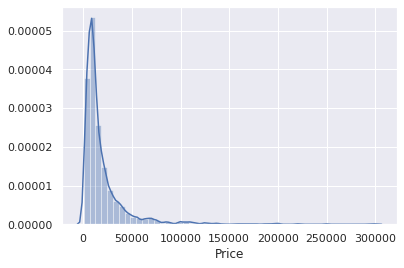

In [ ]:
sns.distplot(data['Price'])

As mentioned before this is indicating that the max of 300,000 is included in the range of data wildly adjusting the regression. This distribution is known as exponential. 

In [ ]:
q = data['Price'].quantile(0.99)
data_1 = data[data['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Ty,Registrati,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswag,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


q is a placeholder variable for the data in the bottom 99% to remove any high outliers. This is indicated by the value in the quantile function. Data_1 is the new variable that will hold the bottom 99% of data to normalize the regression.

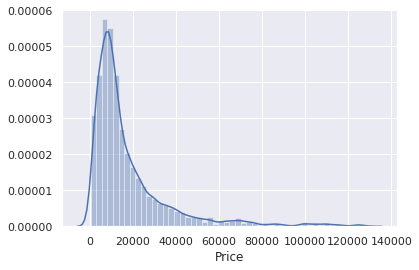

In [ ]:
sns.distplot(data_1['Price'])

Note this distribution is still the same as the previous, although more detailed due to the outliers having been removed. In this instance it may be better to further limit the outliers to get a more accurate regression

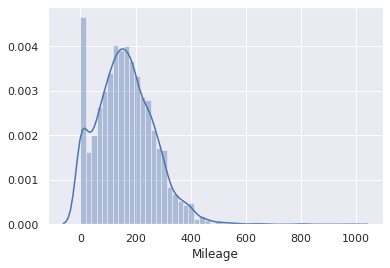

In [ ]:
sns.distplot(data['Mileage'])

This distribution is more accurate although it still showcases some outliers skewing the regression (This can be fixed in the same method as price)

In [ ]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

q once again equals the quantile limitation of the bottom 99% to remove the top 1% of outliers. Data 2 is the new variable to hold the further corrected Series of 'Mileage'

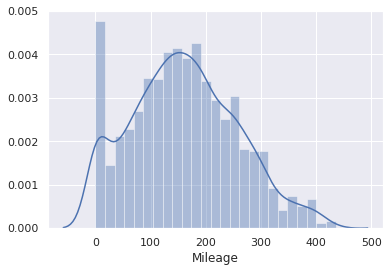

In [ ]:
sns.distplot(data_2['Mileage'])

This plotting indicates that the outliers have been removed further increasing the accuracy of this regression. 

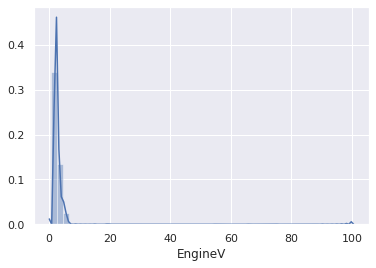

In [ ]:
sns.distplot(data['EngineV'])

Note this distribution indicates a tremendous difference between the mean value and outliers. If you manually view the data this is due to many values being 99.99 (This is frequently used as a placeholder value indicating it is a missing value. 

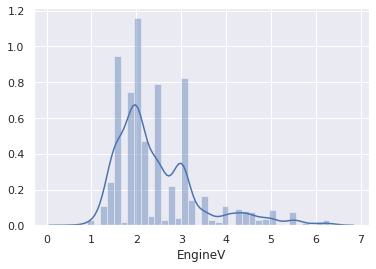

In [ ]:
data_3 = data_2[data_2['EngineV']<6.5]
sns.distplot(data_3['EngineV'])

Rather than using a quantile function this manually removes any value above the indicated value of 6.5 and plots it. This distribution looks much more accurate than the previous one. 

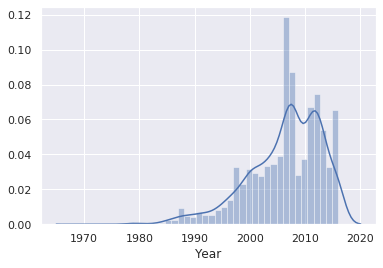

In [ ]:
sns.distplot(data['Year'])

Note this distribution is closer but there are still some outliers on the lower end of the range. 

In [ ]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

This code is storing the values of the bottom 1% of this series so they can then be used as a restrictive to assign the values above them to data_4

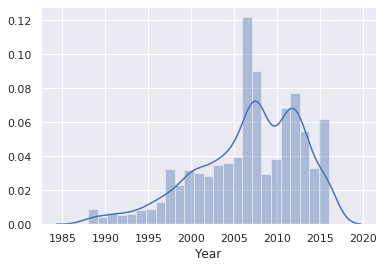

In [ ]:
sns.distplot(data_4['Year'])

This distribution is much more effective after removing the outliers. 

In [ ]:
data_cleaned = data_4.reset_index(drop=True)

This is assigned the variable data_cleaned with the cleaned Series' and resetting the index to make it back to the default of the original datasets. 

In [ ]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Ty,Registrati,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswag,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


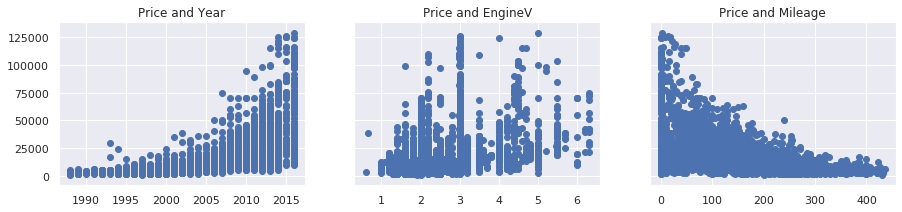

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

This code is creating 3 seperate scatter plots. Each involving the price seperately correlated to other factors like Year, Engine Volume and Mileage. From this scatter plots we can see that the line of best fit is not a straight line. This indicates the common variable of Price is not properly transformed yet. 

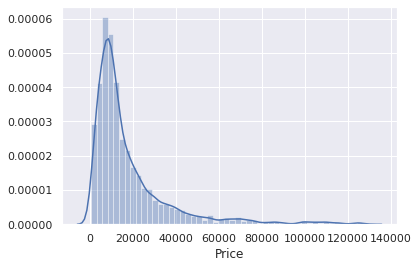

In [ ]:
sns.distplot(data_cleaned['Price'])

Recalling this distribution (Price) shows once again that there are outliers, creating an unusual regression. 

In [ ]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Ty,Registrati,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswag,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


This is assigning a logrithmic transformaiton of the price variable and assigning it to a new series 'log_price' data_cleaned is now called to show that the series as been added at the end of the dataframe. 

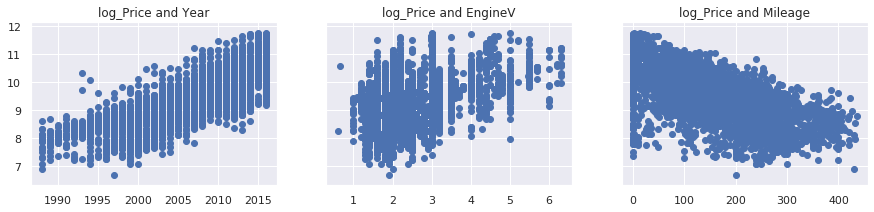

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log_Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log_Price and Mileage')


plt.show()

This is the same code as before although it has been changed to showcase the correlation between log_price and the other series. These scatter plots show that the line of regression in each scatterplot is much more normalized and available now. This is due to price being transformed. 

In [ ]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

In [ ]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Ty', 'Registrati',
       'Year', 'log_price'], dtype=object)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i ) for i in range(variables.shape[1])]
vif["features"] = variables.columns

This is importing the VIF function from statsmodels. A vif is a factor that directly represents how much each indpendent variable effects one another. We are creating another dataframe to indicate the VIF's for each factor.

In [ ]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


These are the VIF's for each independent variable (feature). Generally the goal is to have a VIF between 1 and 5. Some consider anything above 6 as unaccapteable data, some consider 10. 

- An Excerpt from a statistician 

It’s called the variance inflation factor because it estimates how much the variance of a coefficient is “inflated” because of linear dependence with other predictors. Thus, a VIF of 1.8 tells us that the variance (the square of the standard error) of a particular coefficient is 80% larger than it would be if that predictor was completely uncorrelated with all the other predictors.

The VIF has a lower bound of 1 but no upper bound. Authorities differ on how high the VIF has to be to constitute a problem. Personally, I tend to get concerned when a VIF is greater than 2.50, which corresponds to an R2 of .60 with the other variables.

Regardless of your criterion for what constitutes a high VIF, there are at least three situations in which a high VIF is not a problem and can be safely ignored:

1. The variables with high VIFs are control variables, and the variables of interest do not have high VIFs. Here’s the thing about multicollinearity: it’s only a problem for the variables that are collinear. It increases the standard errors of their coefficients, and it may make those coefficients unstable in several ways. But so long as the collinear variables are only used as control variables, and they are not collinear with your variables of interest, there’s no problem. The coefficients of the variables of interest are not affected, and the performance of the control variables as controls is not impaired.

Here’s an example from some of my own work: the sample consists of U.S. colleges, the dependent variable is graduation rate, and the variable of interest is an indicator (dummy) for public vs. private. Two control variables are average SAT scores and average ACT scores for entering freshmen. These two variables have a correlation above .9, which corresponds to VIFs of at least 5.26 for each of them. But the VIF for the public/private indicator is only 1.04. So there’s no problem to be concerned about, and no need to delete one or the other of the two controls.

 2. The high VIFs are caused by the inclusion of powers or products of other variables. If you specify a regression model with both x and x2, there’s a good chance that those two variables will be highly correlated. Similarly, if your model has x, z, and xz, both x and z are likely to be highly correlated with their product. This is not something to be concerned about, however, because the p-value for xz is not affected by the multicollinearity.  This is easily demonstrated: you can greatly reduce the correlations by “centering” the variables (i.e., subtracting their means) before creating the powers or the products. But the p-value for x2 or for xz will be exactly the same, regardless of whether or not you center. And all the results for the other variables (including the R2 but not including the lower-order terms) will be the same in either case. So the multicollinearity has no adverse consequences.

3. The variables with high VIFs are indicator (dummy) variables that represent a categorical variable with three or more categories. If the proportion of cases in the reference category is small, the indicator variables will necessarily have high VIFs, even if the categorical variable is not associated with other variables in the regression model.

Suppose, for example, that a marital status variable has three categories: currently married, never married, and formerly married. You choose formerly married as the reference category, with indicator variables for the other two. What happens is that the correlation between those two indicators gets more negative as the fraction of people in the reference category gets smaller. For example, if 45 percent of people are never married, 45 percent are married, and 10 percent are formerly married, the VIFs for the married and never-married indicators will be at least 3.0.

Is this a problem? Well, it does mean that p-values for the indicator variables may be high. But the overall test that all indicators have coefficients of zero is unaffected by the high VIFs. And nothing else in the regression is affected. If you really want to avoid the high VIFs, just choose a reference category with a larger fraction of the cases. That may be desirable in order to avoid situations where none of the individual indicators is statistically significant even though the overall set of indicators is significant.

In [ ]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

In [ ]:
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Ty,Registrati,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes,van,427,2.9,Diesel,yes,8.974618
2,Mercedes,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswag,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


The intent is fairly clear - remove multicolinearity or limit it to find the values most relevant to the regression. 

In [ ]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

This is setting the data with dummy values corresponding to the brand to make it quantifiable. the drop_first parameter of this function is used because the dummy valuable formula equates as n-1. This is due to the process of elimination. If all other variables dummy values are equal to 0, this means 1 will have to be a value of 1. 

In [ ]:
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes,Brand_Mitsubish,Brand_Renault,Brand_Toyota,Brand_Volkswag,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Ty_Gas,Engine Ty_Other,Engine Ty_Petrol,Registrati_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [ ]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes',
       'Brand_Mitsubish', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswag', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Ty_Gas', 'Engine Ty_Other',
       'Engine Ty_Petrol', 'Registrati_yes'], dtype=object)

This provides the column titles for each in the data. This is a shortcut for entering the arrays. We are arranging the log_price to be the first column. 

In [ ]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes',
       'Brand_Mitsubish', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswag', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Ty_Gas', 'Engine Ty_Other',
       'Engine Ty_Petrol', 'Registrati_yes']

In [ ]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes,Brand_Mitsubish,Brand_Renault,Brand_Toyota,Brand_Volkswag,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Ty_Gas,Engine Ty_Other,Engine Ty_Petrol,Registrati_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


This is assigning the variable data_preprocessed with the new columns specified in data_with_dummies[cols] to indicate the new columns that have been assigned. Note that we assigned the log_price to the first column because it is the target data we are trying to assess. 

In [ ]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

We assign these variables to the given columns to perform the regression. log_price is dropped from inputs to select the remaining columns more efficiently. 

In [ ]:
from sklearn.preprocessing import StandardScaler

This is importing our feature scaler from sklearn to scale our independent variables

In [ ]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

This is assigning the StandScaler function to the scaler variable. Then performing a fit (feature scaling) on the inputs that we assigned to each column value previously. Note the formla Standard scaler is performing is as follows: z = (x - u) / s   bias(weight) = (independent variable - mean) / standard deviation

In [ ]:
inputs_scaled = scaler.transform(inputs)

This actually performs the transformation of the given values in each column (inputs) into their new weighted values. We have assigned these to the variable inputs_scaled.

In [ ]:
from sklearn.model_selection import train_test_split

This is importing a package to split the data into training/test sets. 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

This assigns the variables to the inputs that are split and randomized respectively to each corresponding segment. Test_size indicates that we want it to be 20% of the data. (This is a standard number and appropriate going forward.) 

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_hat = reg.predict(x_train)

This is assigning the predictions from the x_train group as the y_hat or predictive targets

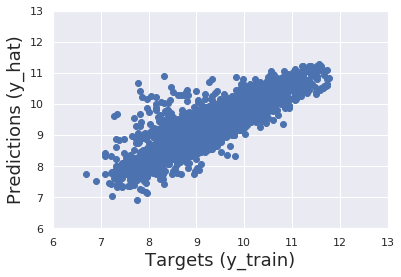

In [ ]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

This is the plot of the values both the y_train examples and the predictions based off of the x_train predictions. We can draw a 45 degree line through the plot and the this is representative of how accurate the predictions are. The closer each point is to the line of regression (45 degree line through the corners) the better the predicitive capability the model has. 

Text(0.5, 1.0, 'Residuals PDF')

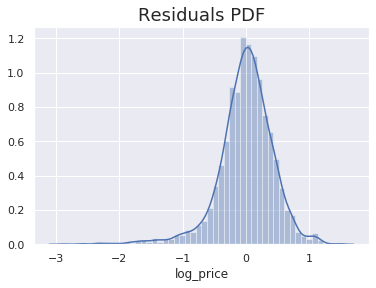

In [ ]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size=18)

We want to find the differences between the predicted targets and the actual log_prices to assess how accurate our model/regression was. These are known as the residuals of the probability distribution function. The goal is to have a mean of 0, however in this plot we can see that there are outliers on the lower end of the spectrum. This indicates that the model most likely overestimates the data. 

In [ ]:
reg.score(x_train,y_train)

0.744996578792662

This is the adjusted R Squared. Indicating that our model predicts about 75% of the variability in what leads to the target. This isn't a bad model, but can be improved. 

In [ ]:
reg.intercept_

9.415239458021299

The intercept of the regression is the constant or y = intercept +coef*x1

In [ ]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [ ]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary


,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes,0.012882
4,Brand_Mitsubish,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswag,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


1. A positive weight shows that as a feature increases in value, so do the log_price and Price respectively

2. A negative weight shows that as a feature increases in value, log_price and 'Price' decrease

In [ ]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes', 'Audi', 'Toyota', 'Renault', 'Volkswag',
       'Mitsubish'], dtype=object)

DUMMY VARIABLES
1. A positive weight shows that the respective category (Brand) is more expensive than the benchmark (Audi). We can find the benchmark (Audi) by assessing which brands are shown in the original set vs. the weighted set. 

2. A negative weight shows that the repsective category (Brand) is less expensive than the benchmark (Audi)


Remember that dummy variables should one compared to one another as they are just that: dummy variables. 

In [ ]:
y_hat_test = reg.predict(x_test)

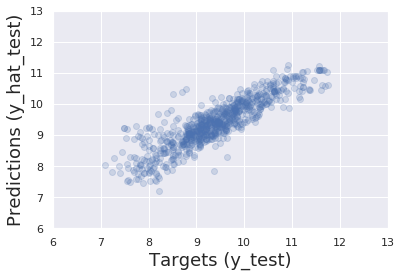

In [ ]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [ ]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075
...,...
769,29651.726363
770,10732.071179
771,13922.446953
772,27487.751303


We use the np.exp method on the y_hat_test values because they are logarithms of the Price values themselves, this will then reverse the logarithmic function to get back to the price values of each. 

In [ ]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
...,...,...
769,29651.726363,6950.0
770,10732.071179,NaN
771,13922.446953,NaN
772,27487.751303,NaN


As we can see there are a lot of NaN values under the Targets column. This is due to the indexes of y_test values having been passed into the dataframe when it was added. 

In [ ]:
y_test = y_test.reset_index(drop = True)

In [ ]:
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [ ]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [ ]:
df_pf['Residual_Difference'] = df_pf['Target'] - df_pf['Prediction']

In [ ]:
df_pf['Difference%'] = np.absolute(df_pf['Residual_Difference']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual_Difference,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [ ]:
df_pf.describe()

,Prediction,Target,Residual_Difference,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080
